#Introduction to Neural Networks

##What is a Neural Network?

Neural networks have been receiving a lot of attention lately because of their success in computer vision (e.g. Google's Deep Dream images), speech recognition and synthesis, and pattern classification. So this begs the question, "What exactly is a neural network?".

Artificial neural networks, or ANNs, are a family of computational models inspired by the brain which are used to approximate highly complex functions. A single neural network is composed of many highly interconnected processing elements (the nodes aka neurons) which each perform some basic computation on their inputs. Each neuron typically receives many inputs from other neurons in the network, and outputs a nonlinear function of the sum of its weighted inputs. The output from this neuron is then passed through the network as input to the next set of neurons. In this way, the neural network "deconstructs" and parallelizes its inputs, and then "reconstructs" a target state or classification.

There are many types of neural networks, each of which has its own connectivity and dynamics, however all neural networks share the concept of training by modifying its connection weights. It is by manipulating these weights that the neural network learns to reconstruct the desired targets in the case of supervised learning, or an efficient compression of its inputs in the case of unsupervised learning.

In this tutorial, we'll take a look at one of the simplest neural networks: the multilayer perceptron (MLP), also known as the feedforward neural network.

##The Multilayer Perceptron

<img src="MultiLayerPerceptron.png">

Shown above is a simple multilayer perceptron. In this diagram, each of the circles represents a node, or neuron, in the network. Each neuron receives input from the previous layer of neurons (except the first layer, which receives the raw input), computes a nonlinear function on the sum of its inputs, and sends its output to the next layer of neurons. Notice that there are no arrows between neurons within a layer, or going backwards between layers. For this reason, MLPs are also known as "feedforward" networks to distinguish them with "recurrent" networks, which have much more complex dynamics.

The network above has three layers; the first layer is called the input layer, the second layer is known as the hidden layer, and the last layer is called the output layer. MLPs can have any number of hidden layers, but always have one input and one output layer. Each layer can be composed of any number of neurons, provided there are no connections within a layer.

When the network is first initialized, random weights are assigned to the connections between the individual neurons. When the network is given an input, it uses those random connection weights to pass the activity forward one layer at a time, eventually reaching the output layer. 

When the activity reaches the output layer, the activity in the output layer is compared with a set of target values (thus the MLP is a supervised learning algorithm). These error values are then used to change the weights of the connections such that the error is reduced by a small amount. Over time, the error is minimized more and more until the network begins to correctly classify its input.

##Activation Functions

That's all well and good, but how do we *actually* perform the feedforward pass? What nonlinear function should the neurons compute? In practice, the logistic function is the most often used activation function, for several reasons:

* It is simple to compute
* Its derivative is equally simple to compute (important for reasons given below)
* It only outputs values between 0 and 1

The **logistic function** is given by the following formula:

$$f(x) = \frac{1}{ 1 + e^{-x} }$$

If we have a neuron $j$ with inputs $x_i$ and corresponding connection weights $w_{ij}$, the total input into neuron $j$ is given by:

$$I_j = \sum_{i=1}^{N} x_iw_{ij}$$

Where N is the total number of inputs into neuron $j$. Hence, the output of neuron $j$ is:

$$y_j = \frac{1}{ 1 + e^{-I_j} }$$

This process of summing weighted inputs and squashing them with the sigmoid function is repeated for each neuron in the network until the values of the output neurons are finally computed.

##Backpropagation of Error

Now that we know how to pass the activity forward through the network, we can obtain the error for each of the output neurons by comparing their activity with their target values. The question now becomes, how do we use the error information to change the weights of the network?

This is done via a process called the "backpropagation of error". Let's first define the error measure we're trying to minimize. Here, we're going to use the sum of squared error with a factor of a half to make the derivative nice:

$$E = \frac{1}{2}\sum_{j=1}^{N_j} (t_j - y_j)^2$$

Where $y_j$ is the actual output, and $t_j$ is the target output for neuron $j$. We can take the derivative of this error to find out how the error will change as we change the activity of the output neuron.

$$\frac{\partial E}{\partial y_j} = -(t_j - y_j)$$

This gives us an idea of *how fast* the error is changing as we change $y_i$, and in *which direction* it changes. We can use this information to adjust the input weights of a neuron such that it **decreases the error**. To do that, we need error derivatives for *all* the neurons in the network, not just the output neurons.

Luckily, we can use the error derivatives with respect to the activities of the output neurons $y_j$ to compute the error derivatives with respect to the previous, hidden layer activities $y_i$. In order to do this, we must first look at how the error changes as we change the total input into neuron $j$. This is given by the chain rule.

$$\frac{\partial E}{\partial I_j} = \frac{dy_j}{dI_j} \frac{\partial E}{\partial y_j}$$

Since $y_j$ is just the sigmoid function of $I_j$, $\partial y_j/\partial I_j$ is simply the derivative of the sigmoid function, which is given by:

$$\frac{\partial y_j}{\partial I_j} = y_j(1-y_j)$$

Now we can combine this with our previously derived expression for $\partial E/\partial y_j$ to obtain:

$$\frac{\partial E}{\partial I_j} = - y_j (1-y_j) (t_j - y_j)$$

Since each neuron $i$ in the hidden layer below affects **all** of the output neurons, its *total* effect on the error is given by summing its effects on each of the output neurons. This can be expressed as follows:

$$\frac{\partial E}{\partial y_i} = \sum_{j=1}^{N_j} \frac{\partial I_j}{\partial y_i} \frac{\partial E}{\partial I_j}$$

The first derivative in the sum is the change in an output neuron's total input $I_j$ as you change the activity of a neuron $y_i$ in the previous layer. But this is simply the connection weight between neuron $i$ and $j$ ! So we can express the above error derivative as:

$$\frac{\partial E}{\partial y_i} = \sum_{j=1}^{N_j}w_{ij} \frac{\partial E}{\partial I_j}$$

We can repeat this process to get the error derivatives for every neuron in each layer of the network. So now that we have the error derivatives for all the neurons, *how do we apply the weight update?*

We start by defining the change in error with respect to the connection weight $w_{ij}$. This will tell us how much a particular weight is contributing to the error, and the direction we need to change it to reduce that error. Again using our trusty chain rule:

$$\frac{\partial E}{\partial w_{ij}} = \frac{\partial I_j}{\partial w_{ij}} \frac{\partial E}{\partial I_j}$$

However, the first term on the right is just the activity of neuron $i$ in the layer below, and the second term we computed above. Thus we finally obtain:

$$\frac{\partial E}{\partial w_{ij}} = y_i \frac{\partial E}{\partial I_j}$$

To change the weight $w_{ij}$, we multiply the derivative by a small number $-\epsilon$ and add this to the current value of the weight. This will change the weight a small amount in a direction that decreases the error. The negative sign is there, because we want to *decrease* the error.

$$\Delta w_{ij} = -\epsilon \frac{\partial E}{\partial w_{ij}}$$

##Building a Neural Network

Now that we have an idea of how a neural network is able to change its weights to minimize an error function, let's build one! We're going to use Python's class system for this, which I will give a gentle introduction to. If you're already familiar with classes, the way I present things might seem strange, so bear with me.

First let's import everything we're gonna need, which isn't much. Mostly numpy, and sklearn for the training and a comparison to SVMs.

Most of the code for this network was adapted from a fantastic introduction to neural networks with Python at over at Data Boys Learning, so please be sure to go check it out: http://databoys.github.io/Feedforward/

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.cross_validation import train_test_split

Now let's define our sigmoid function and its derivative.

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x)*(1-sigmoid(x))

Now let's define an initialization function for our network. We'll be introducing some special variables here which will make sense when I explain classes later.

In [7]:
def __init__(self, input_dim, hidden_dim, output_dim):
    #Initialize our neural network with a given number of input, hidden, and output neurons
    #Notice that all variables start with "self.", I'll explain this in a moment
    
    self.input = input_dim + 1 #the extra "1" here is for the bias node
    self.hidden = hidden_dim
    self.output = output_dim
    
    #Create an array of input, hidden, and output activities, and initialize them to all ones
    self.ai = np.ones(self.input)
    self.ah = np.ones(self.hidden)
    self.ao = np.ones(self.output)
    
    #Create a matrix of random connection weights (drawn from a gaussian distribution)
    self.wih = np.random.randn(self.input, self.hidden)
    self.who = np.random.randn(self.hidden, self.output)
    
    #Create a matrix of weight updates, and initialize them to all zeros
    self.ci = np.zeros((self.input, self.hidden))
    self.co = np.zeros((self.hidden, self.output))

Now that we have a function to initialize our neural network, we can create a new function that performs a single forward pass on the network.

In [8]:
def feedforward(self, inputs):
    #Feed inputs into the network and perform a forward pass to get activities of all neurons
    
    #Just in case we enter the wrong number of inputs
    if len(inputs) != self.input - 1: # -1 to exclude the bias node
        raise ValueError('Wrong input dimension')
    
    #Loop over the number of input neurons and set the activities equal to the inputs
    for i in range(self.input - 1): 
        self.ai[i] = inputs[i]
    
    #Loop over the number of hidden neurons
    for j in range(self.hidden):
        sum = 0.0
        
        #For each hidden neuron j, loop over the input neurons and calculate the total input into j
        for i in range(self.input):
            sum += self.ai[i] * self.wih[i,j]
            
        #return the sigmoid of the total input
        self.ah[j] = sigmoid(sum)
        
    #Do the same thing with the output neurons
    for k in range(self.output):
        sum = 0.0
        for j in range(self.hidden):
            sum += self.ah[j] * self.who[j,k]
        self.ao[k] = sigmoid(sum)
        
    #Return the activities of the output neurons
    return self.ao

Alright, we've computed our output neuron activities, so now we can compare these activities to our target values for each output neuron. This is where we'll approximate our error derivatives using the backpropagation algorithm.

In [9]:
def backpropagate(self, targets, learning_rate):
    #Backpropagate the error through the network and calculate the error derivatives "deltas"
    
    #In case we input the wrong number of targets
    if len(targets) != self.output:
        raise ValueError('Wrong output dimension')
        
    #Initialize the error derivatives, or deltas, to zero
    output_deltas = np.zeros(self.output)
    
    #First compute the output layer deltas
    for k in range(self.output):
        error = -(targets[k] - self.ao[k])
        output_deltas[k] = sigmoid_derivative(self.ao[k]) * error
        
    #Next compute the hidden layer deltas
    hidden_deltas = np.zeros(self.hidden)
    for j in range(self.hidden):
        
        #Here we must sum over all the output neurons k to determine the total effect of changing hidden activity j
        error = 0.0
        for k in range(self.output):
            error += output_deltas[k] * self.wo[j][k]
        hidden_deltas[j] = sigmoid_derivative(self.ah[j]) * error
    
    #Now update the hidden to output weights
    for j in range(self.hidden):
        for k in range(self.output):
            change = output_deltas[k] * self.ah[j]
            self.wo[j][k] -= N * change + self.co[j][k]
            self.co[j][k] = change
            
    #Finally, update the input to hidden weights
    for i in range(self.input):
        for j in range(self.hidden):
            change = hidden_deltas[j] * self.ai[i]
            self.wi[i][j] -= N * change + self.ci[i][j]
            self.ci[i][j] = change
            
    #Return the total error
    error = 0.0
    for k in range(len(targets)):
        error += 0.5 * (targets[k] - self.ao[k]) ** 2
        
    return error

We now have functions that will initialize a neural network, perform a forward pass, then backpropagate the error through the network, and finally apply an update to the weights in the network. Let's put these all together into a function that will train the network on a set of training data for a given number of iterations and a function that will make predictions on new data.

In [21]:
def train(self, patterns, iterations = 3000, N = 0.0002):
    #Train the network on a set of patterns for a given number of iterations at a specified learning rate
    
    for i in range(iterations):
        error = 0.0
        
        #For each pattern, perform a forward pass and backpropagate
        for p in patterns:
            inputs = p[0]
            targets = p[1]
            self.feedforward(inputs)
            error = self.backpropagate(targets, N)
            
        #Every 500th iteration, print the current error
        if i % 500 == 0:
            print('error %-.5f' % error)
            
def predict(self, X):
    #Return an array of predictions for the target classes in the network
    
    predictions = []
    for p in X:
        predictions.append(self.feedforward(p))
        
    return predictions

##Classes

Ok, now is a perfect time to introduce classes. Classes are a fundamental part of the Python programming language, and many other languages as well. In fact, you've dealt with many types of classes in Python already, for example the Support Vector Machine in SkLearn and the Pandas Dataframe.

Python is what's known as an "object-oriented" programming language. This means it has the ability to create **instances** of objects which store local variables and functions inside of them. When you loaded a dataframe into Pandas, you created an instance of the dataframe class in one of Pandas' modules. You can create many instances of the same class, and each one will store different information based on what you pass into the class function. You can access any of these instances by typing in whatever you've named your instance when you created it followed by a period.

For example, if I created a Pandas dataframe called "data", I can access any of the variables stored inside "data" by typing

<code>data.variable_name_here</code>

Where variable_name_here is one of the variables stored in "data". We can also create our own classes in Python by using the class syntax.

Let's create a class which stores the variables and functions of our neural network. Then we can be sure the variables we compute won't go anywhere when we're not inside the individual functions, and we can also create different networks with different parameters just by instantiating them differently.

In [ ]:
class neural_network(object):
    def __init__(self, input_dim, hidden_dim, output_dim):
        #Initialize our neural network with a given number of input, hidden, and output neurons
        #Notice that all variables start with "self.", I'll explain this in a moment
        
        self.input = input_dim + 1 #the extra "1" here is for the bias node
        self.hidden = hidden_dim
        self.output = output_dim
    
        #Create an array of input, hidden, and output activities, and initialize them to all ones
        self.ai = np.ones(self.input)
        self.ah = np.ones(self.hidden)
        self.ao = np.ones(self.output)
    
        #Create a matrix of random connection weights (drawn from a gaussian distribution)
        self.wih = np.random.randn(self.input, self.hidden)
        self.who = np.random.randn(self.hidden, self.output)
    
        #Create a matrix of weight updates, and initialize them to all zeros
        self.ci = np.zeros((self.input, self.hidden))
        self.co = np.zeros((self.hidden, self.output))
        
    def feedforward(self, inputs):
        #Feed inputs into the network and perform a forward pass to get activities of all neurons

        #Just in case we enter the wrong number of inputs
        if len(inputs) != self.input - 1: # -1 to exclude the bias node
            raise ValueError('Wrong input dimension')
    
        #Loop over the number of input neurons and set the activities equal to the inputs
        for i in range(self.input - 1): 
            self.ai[i] = inputs[i]
    
        #Loop over the number of hidden neurons
        for j in range(self.hidden):
            sum = 0.0
            
            #For each hidden neuron j, loop over the input neurons and calculate the total input into j
            for i in range(self.input):
                sum += self.ai[i] * self.wih[i,j]
            
            #return the sigmoid of the total input
            self.ah[j] = sigmoid(sum)
            
        #Do the same thing with the output neurons
        for k in range(self.output):
            sum = 0.0
            for j in range(self.hidden):
                sum += self.ah[j] * self.who[j,k]
            self.ao[k] = sigmoid(sum)
        
        #Return the activities of the output neurons
        return self.ao
    
    def backpropagate(self, targets, N):
        #Backpropagate the error through the network and calculate the error derivatives "deltas"
        
        #In case we input the wrong number of targets
        if len(targets) != self.output:
            raise ValueError('Wrong output dimension')
            
        #Initialize the error derivatives, or deltas, to zero
        output_deltas = np.zeros(self.output)
        
        #First compute the output layer deltas
        for k in range(self.output):
            error = -(targets[k] - self.ao[k])
            output_deltas[k] = sigmoid_derivative(self.ao[k]) * error
        
        #Next compute the hidden layer deltas
        hidden_deltas = np.zeros(self.hidden)
        for j in range(self.hidden):
            
            #Here we must sum over all the output neurons k to determine the total effect of changing hidden activity j
            error = 0.0
            for k in range(self.output):
                error += output_deltas[k] * self.who[j][k]
            hidden_deltas[j] = sigmoid_derivative(self.ah[j]) * error
        
        #Now update the hidden to output weights
        for j in range(self.hidden):
            for k in range(self.output):
                change = output_deltas[k] * self.ah[j]
                self.who[j][k] -= N * change + self.co[j][k]
                self.co[j][k] = change
            
        #Finally, update the input to hidden weights
        for i in range(self.input):
            for j in range(self.hidden):
                change = hidden_deltas[j] * self.ai[i]
                self.wih[i][j] -= N * change + self.ci[i][j]
                self.ci[i][j] = change
            
        #Return the total error
        error = 0.0
        for k in range(len(targets)):
            error += 0.5 * (targets[k] - self.ao[k]) ** 2
        
        return error
    
    def train(self, inputs, targets, iterations = 100, N = 0.0002):
        #Train the network on a set of patterns for a given number of iterations at a specified learning rate
        
        for i in range(iterations):
            error = 0.0
            
            #For each pattern, perform a forward pass and backpropagate
            self.feedforward(inputs)
            error = self.backpropagate(targets, N)
                
            #Every 500th iteration, print the current error
            if i % 10 == 0:
                print('error %-.5f' % error)
            
    def predict(self, X):
        #Return an array of predictions for the target classes in the network
        
        predictions = []
        for p in X:
            predictions.append(self.feedforward(p))
        
        return predictions

So now we've built a class which will instantiate a neural network for us. We can test it out on some training data with the help of SkLearn. Let's go ahead and import our dataset, which will be the digits dataset we know and love. Next we'll create an instance of our neural network and test it on the data.

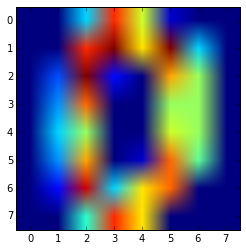

In [75]:
%matplotlib inline
digits = datasets.load_digits()
plt.imshow(digits.images[0])
plt.show()

In [83]:
data_train, data_test, labels_train, labels_test = \
    train_test_split(digits.data, digits.target, test_size = 0.3, random_state = 42)

In [94]:
network = neural_network(64, 100, 10)
newlabels = np.zeros((len(labels_train), 10))

for index,value in enumerate(labels_train):
    for x in range(10):
        if value == x:
            newlabels[index][value] = 1

In [ ]:
for i in range(len(labels_train)):
    network.train(data_train[i], newlabels[i])

error 1.89600
error 0.00000
error 0.00000
error 0.00000
error 0.00000
error 0.00000